In [1539]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray
from uncertainties import unumpy as unp 
import scipy.constants as const

Tabelle: Kennlinien

In [1540]:
md1 = pd.read_csv('tables/md1.csv')
print(md1.to_latex(index = False, column_format= "c c c c c c", decimal=',')) 

\begin{tabular}{c c c c c c}
\toprule
 U/V &  I/mA &  I/mA.1 &  I/mA.2 &  I/mA.3 &  I/mA.4 \\
\midrule
   0 & 0,000 &   0,000 &   0,000 &   0,000 &   0,000 \\
   5 & 0,010 &   0,012 &   0,014 &   0,016 &   0,017 \\
  10 & 0,022 &   0,028 &   0,033 &   0,036 &   0,039 \\
  15 & 0,034 &   0,045 &   0,053 &   0,058 &   0,061 \\
  20 & 0,044 &   0,062 &   0,076 &   0,084 &   0,089 \\
  25 & 0,060 &   0,080 &   0,096 &   0,104 &   0,110 \\
  30 & 0,070 &   0,096 &   0,116 &   0,130 &   0,137 \\
  35 & 0,082 &   0,114 &   0,140 &   0,158 &   0,169 \\
  40 & 0,092 &   0,134 &   0,168 &   0,194 &   0,207 \\
  45 & 0,102 &   0,155 &   0,201 &   0,230 &   0,246 \\
  50 & 0,107 &   0,170 &   0,228 &   0,265 &   0,287 \\
  60 & 0,111 &   0,213 &   0,285 &   0,337 &   0,371 \\
  70 & 0,119 &   0,231 &   0,340 &   0,425 &   0,480 \\
  80 & 0,123 &   0,247 &   0,402 &   0,515 &   0,586 \\
  90 & 0,124 &   0,270 &   0,459 &   0,608 &   0,694 \\
 100 & 0,124 &   0,272 &   0,517 &   0,685 &   0,790 \\
 

Daten auswerten:

In [1541]:
np.savetxt('tables/md1.txt', md1.values, fmt='%.3f')
U, k1, k2, k3, k4, k5 = np.genfromtxt('tables/md1.txt', unpack=True)

Plot 1:

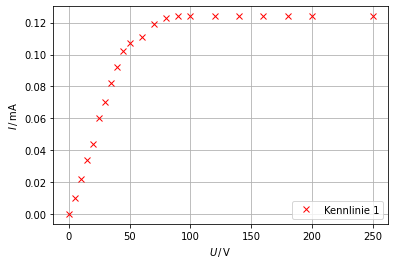

In [1542]:
plt.plot(U, k1, 'xr', label = "Kennlinie 1", zorder=2)

plt.xlabel(r'$U \, / \, \mathrm{V}$')
plt.ylabel(r'$I \, / \, \mathrm{mA}$')
plt.legend(loc="best")     
plt.grid(True)

plt.show()

Plot 2:

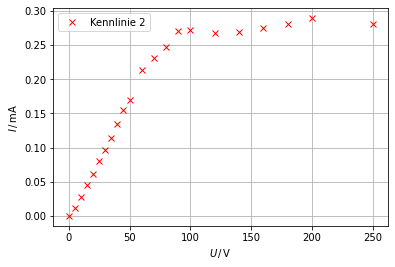

In [1543]:
plt.plot(U, k2, 'xr', label = "Kennlinie 2")

plt.xlabel(r'$U \, / \, \mathrm{V}$')
plt.ylabel(r'$I \, / \, \mathrm{mA}$')
plt.legend(loc="best")     
plt.grid(True)


Plot 3:

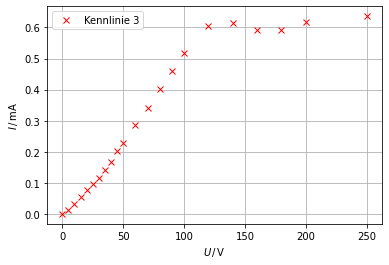

In [1544]:
plt.plot(U, k3, 'xr', label = "Kennlinie 3")

plt.xlabel(r'$U \, / \, \mathrm{V}$')
plt.ylabel(r'$I \, / \, \mathrm{mA}$')
plt.legend(loc="best")     
plt.grid(True)   

Plot 4:

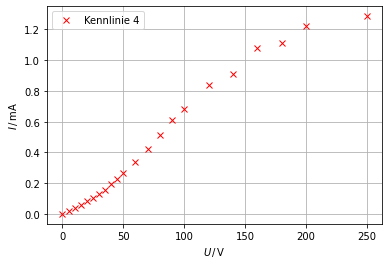

In [1545]:
plt.plot(U, k4, 'xr', label = "Kennlinie 4")

plt.xlabel(r'$U \, / \, \mathrm{V}$')
plt.ylabel(r'$I \, / \, \mathrm{mA}$')
plt.legend(loc="best")     
plt.grid(True)   

Plot 5:

            3             2
-1.413e-07 x + 5.232e-05 x + 0.004119 x - 0.01655
            2
-4.239e-07 x + 0.0001046 x + 0.004119
 
-8.479e-07 x + 0.0001046
 
-8.479e-07
2.045161068051923


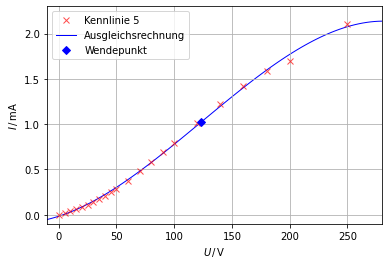

In [1546]:
plt.plot(U, k5, 'xr', label = "Kennlinie 5", zorder=2, alpha = 0.7)

z = np.polyfit(U, k5, 3)
p = np.poly1d(z)
xp = np.linspace(-50, 280, 100)
plt.plot(xp, p(xp), '-b', label = "Ausgleichsrechnung", linewidth = 1, zorder=1)

dp = p.deriv()
ddp = dp.deriv()
dddp = ddp.deriv()

print(p)
print(dp)
print(ddp)
print(dddp)

x = 0.0001046/8.479e-07

xp = np.linspace(-50, 280, 100)
plt.plot(x, p(x), 'Db', label = "Wendepunkt", markersize = 6, zorder=3)

plt.xlabel(r'$U \, / \, \mathrm{V}$')
plt.ylabel(r'$I \, / \, \mathrm{mA}$')
plt.legend(loc="best")     
plt.grid(True)
plt.xlim(-10, 280) 
plt.ylim(-0.1, 2.3) 

print(2*p(x))

Kennlinienschar Plot:

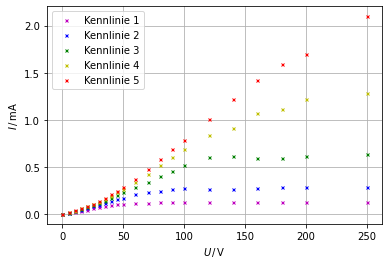

In [1547]:
plt.plot(U, k1, 'xm', label = "Kennlinie 1", markersize=3, alpha = 1)
plt.plot(U, k2, 'xb', label = "Kennlinie 2", markersize=3, alpha = 1)
plt.plot(U, k3, 'xg', label = "Kennlinie 3", markersize=3, alpha = 1)
plt.plot(U, k4, 'xy', label = "Kennlinie 4", markersize=3, alpha = 1)
plt.plot(U, k5, 'xr', label = "Kennlinie 5", markersize=3, alpha = 1)

plt.xlabel(r'$U \, / \, \mathrm{V}$')
plt.ylabel(r'$I \, / \, \mathrm{mA}$')
plt.legend(loc="best")     
plt.grid(True)   

(3.74+/-0.12)e+03
a = (-61.116 +- 0.984 )*10-3


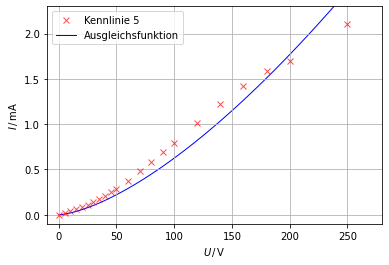

In [1582]:
plt.plot(U, k5, 'xr', label = "Kennlinie 5", zorder=2, alpha = 0.7)

def lsr(u, a):
    return (4/9) * const.epsilon_0 * np.sqrt(2 * const.elementary_charge/ const.electron_mass) * u**(3/2)/a**2

para, pcov = curve_fit(lsr, U, k5)
a = para
fa = np.sqrt(np.diag(pcov))

ua = ufloat(a, fa) 

xx = np.linspace(0, 280, 100)
plt.plot(xx, lsr(xx, noms(ua)), '-b', label = "Ausgleichsfunktion", linewidth = 1, zorder=1)

plt.xlabel(r'$U \, / \, \mathrm{V}$')
plt.ylabel(r'$I \, / \, \mathrm{mA}$')
plt.legend(loc="best")     
plt.grid(True)
plt.xlim(-10, 280)
plt.ylim(-0.1, 2.3)

ua = ua*10**3
print(ua**2)
print('a = (%.3f +- %.3f )*10-3' % (noms(ua), stds(ua)))